<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's order data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:

movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:

round(movies.duration.mean())

121.0

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer: 

movies.sort_values('duration', ascending=False).head(1)


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [7]:
# Answer: 

movies.sort_values('duration', ascending=False).tail(1)


,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

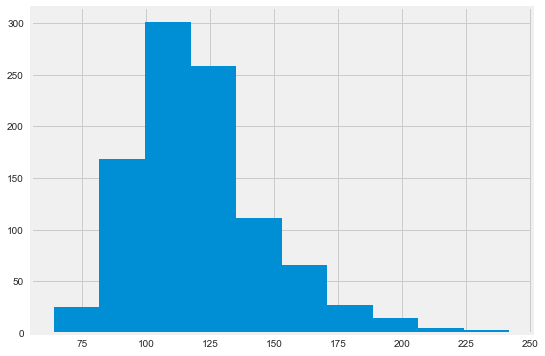

In [8]:
# Answer:

movies.duration.hist();

#### Use a box plot to display that same data.

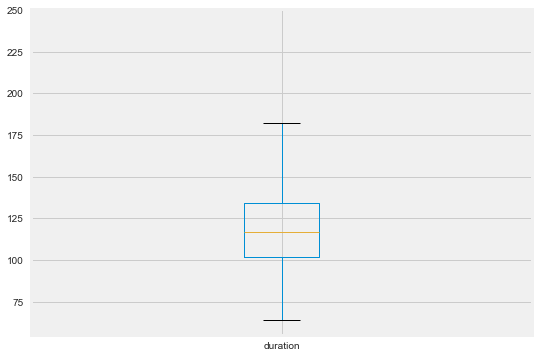

In [9]:
# Answer:


movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

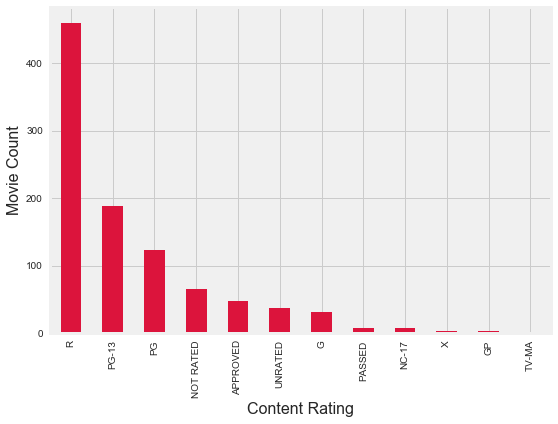

In [11]:
# Answer:

graph = movies.content_rating.value_counts().plot(kind='bar', color='crimson');

graph.set_ylabel('Movie Count', fontsize=16);
graph.set_xlabel('Content Rating', fontsize=16);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:

movies.content_rating.replace('NOT RATED', 'UNRATED', inplace=True)
movies.content_rating.replace('APPROVED', 'UNRATED', inplace=True)
movies.content_rating.replace('PASSED', 'UNRATED', inplace=True)
movies.content_rating.replace('GP', 'UNRATED', inplace=True)

movies.content_rating.value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:

movies.content_rating.replace('X', 'NC-17', inplace=True)
movies.content_rating.replace('TV-MA', 'NC-17', inplace=True)

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Answer:

print(movies.isnull().sum())

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:

movies[movies.content_rating.isnull()]




,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
# Answer:

movies.content_rating.fillna(value='UNRATED', inplace=True)

print movies[movies.content_rating.isnull()]

Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [17]:
# Answer:


over2 = movies[(movies['duration'] >= 120)]
over2_rating = over2.star_rating.mean()

under2 = movies[(movies['duration'] < 120)]
under2_rating = under2.star_rating.mean()


print "average rating over 2hr is", over2_rating
print "average rating under 2hr is", under2_rating

average rating over 2hr is 7.94889867841
average rating under 2hr is 7.83866666667


#### Use a visualization to detect whether there is a relationship between duration and star rating.

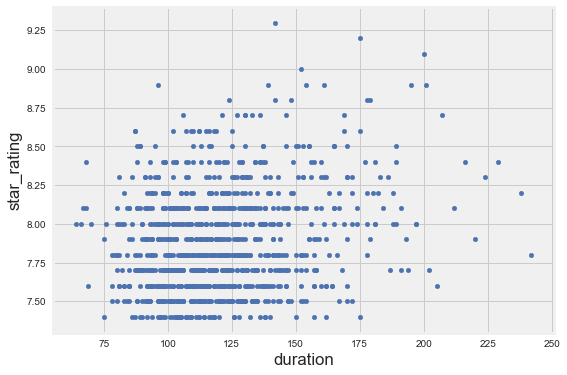

In [18]:
# Answer:

movies.plot(kind='scatter', x='duration', y='star_rating');

#### Calculate the average duration for each genre.

In [19]:
# Answer:

movies.groupby('genre').duration.mean()



genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

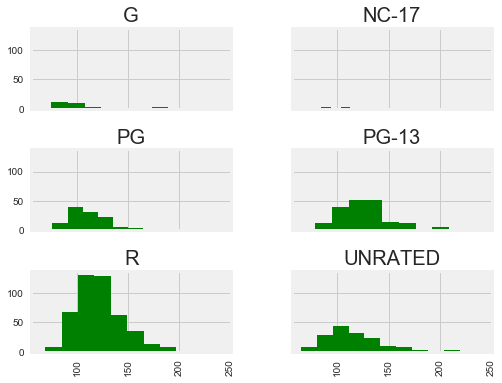

In [20]:
# Answer:

movies.hist(column='duration', by='content_rating', bins=10, sharex=True, sharey=True, color='green');


#### Determine the top rated movie (by star rating) for each genre.

In [21]:
# Answer:


movies.groupby('genre').star_rating.max()



genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:

movies[movies.title.duplicated()]    

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [23]:
# Answer:

movies[movies.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [55]:
# Answer:

opt1 = movies.genre.value_counts()

print movies[(movies.genre == 'Drama') | (movies.genre == 'Comedy') |(movies.genre == 'Action') |(movies.genre == 'Crime') |(movies.genre == 'Biography') |(movies.genre == 'Adventure') |(movies.genre == 'Animation') |(movies.genre == 'Horror') |(movies.genre == 'Mystery')].genre.value_counts()



Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [41]:
# Answer:


opt2 = movies.genre.value_counts()

print opt2[opt2 >= 10]


Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Name: genre, dtype: int64


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [44]:
# Answer:

movies.groupby('genre').star_rating.mean()
print opt3[opt2>=10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 4: aggregate by count and mean, then filter using the count

In [49]:
# Answer:

opt4 = movies.groupby('genre').star_rating.agg(['count', 'mean']).sort_values('count')

print opt4[opt2 >=10]

           count      mean
genre                     
Mystery       16  7.975000
Horror        29  7.806897
Animation     62  7.914516
Adventure     75  7.933333
Biography     77  7.862338
Crime        124  7.916935
Action       136  7.884559
Comedy       156  7.822436
Drama        278  7.902518


C:\Users\589946\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


## Bonus

#### Figure out something "interesting" using the actors data!

In [30]:
import ast
actor_count = {}
for alist in movies.actors_list:
    alist = ast.literal_eval(alist)
    for actor in alist:
        if actor not in actor_count.keys():
            actor_count[actor] = 1
        else:
            actor_count[actor] = actor_count[actor] + 1





In [56]:
print "TOP 20 MOST COMMON ACTORS IN DATASET:"

def keyfunction(k):
    return actor_count[k]

for key in sorted(actor_count, key=keyfunction, reverse=True)[:20]:
    print "%s: %i" % (key, actor_count[key])

TOP 20 MOST COMMON ACTORS IN DATASET:
Robert De Niro: 18
Tom Hanks: 14
Brad Pitt: 14
Clint Eastwood: 14
Al Pacino: 13
Johnny Depp: 12
Dustin Hoffman: 11
Christian Bale: 11
Leonardo DiCaprio: 11
James Stewart: 10
Denzel Washington: 10
Harrison Ford: 10
Julianne Moore: 10
Jack Nicholson: 9
Ethan Hawke: 9
Russell Crowe: 9
Ed Harris: 9
Sean Connery: 9
Cary Grant: 8
Jake Gyllenhaal: 8
